In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mbti-type/mbti_1.csv


**Import Libaries and load dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords #import irrelevant words to remove
from nltk.stem.porter import PorterStemmer #stemming the review -> only root of the word to convey meaning
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imblearn.over_sampling import SMOTE

In [3]:
dataset = pd.read_csv("/kaggle/input/mbti-type/mbti_1.csv")

Feature Engineering: Let's add categories for each trait
* I = 1 E = 0
* N = 1 S = 0
* T = 1 F = 0
* P = 1 J = 0

In [4]:
dataset["I"] = 0
for i in range(dataset.shape[0]):
    if dataset.loc[i,"type"].find("I") != -1:
        dataset.loc[i,"I"] = 1
    else:
        dataset.loc[i,"I"] = 0
dataset["N"] = 0
for i in range(dataset.shape[0]):
    if dataset.loc[i,"type"].find("N") != -1:
        dataset.loc[i,"N"] = 1
    else:
        dataset.loc[i,"N"] = 0
dataset["T"] = 0
for i in range(dataset.shape[0]):
    if dataset.loc[i,"type"].find("T") != -1:
        dataset.loc[i,"T"] = 1
    else:
        dataset.loc[i,"T"] = 0
dataset["P"] = 0
for i in range(dataset.shape[0]):
    if dataset.loc[i,"type"].find("P") != -1:
        dataset.loc[i,"P"] = 1
    else:
        dataset.loc[i,"P"] = 0

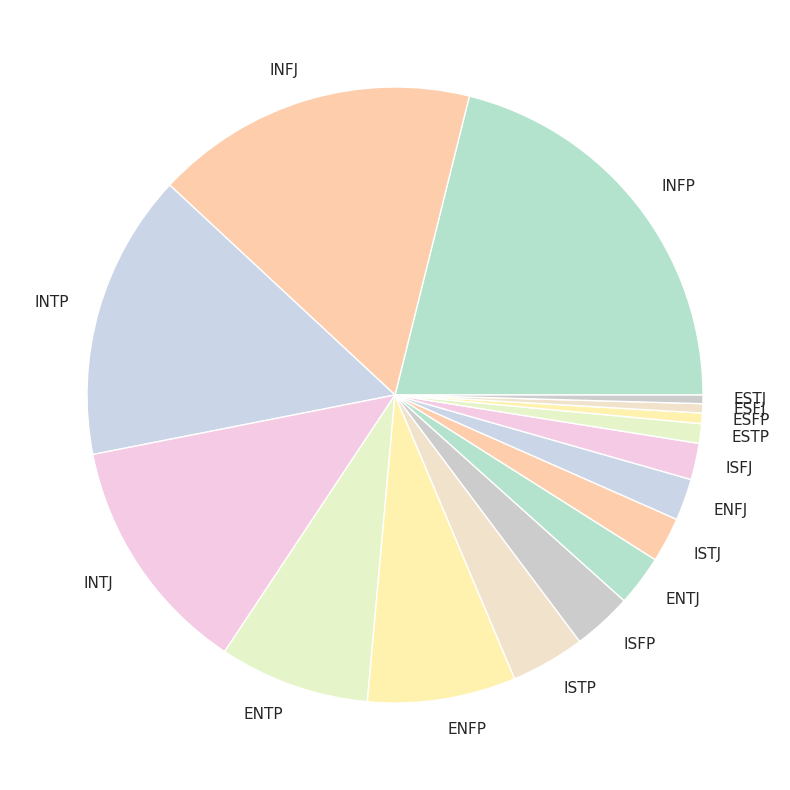

In [5]:
sns.set_theme()
mbti_dict = dataset['type'].value_counts().to_dict()
mbti = list(mbti_dict.keys())
vals = list(mbti_dict.values())
fig, ax = plt.subplots(1,1,figsize = (10,10))
#plt.bar(mbti, vals, color = "xkcd:salmon")
#plt.xlabel("MBTI")
#plt.ylabel("Count")
plt.pie(vals, labels = mbti, colors = plt.cm.Pastel2.colors)
plt.show()

**Insights:**
* INFP's, INFJ's, and INTP's and INTJ's make up the majority of our dataset out of ALL the 16
* There may be bias in our machine learning model towards intuition and introversion, requiring us to oversample the minority via the SMOTE technique

Natural Language Processing and Bag of words model
Steps:
* Remove URL's
* Remove Stopwords and mentions of MBTI
* Convert all of the words into their stemmed form
* Create bag of words model

Note: Due to large size of this dataset, I will only be using 2000 random observations.

In [6]:
def remove_urls(text):
    text = text.replace(" ", " ")
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [7]:
dataset["modified_post"] = dataset["posts"].apply(remove_urls)

In [8]:
ps = PorterStemmer()
all_stopwords = stopwords.words("english")
all_stopwords.remove("not")
all_stopwords.append("intj")
all_stopwords.append("infj")
all_stopwords.append("entp")
all_stopwords.append("enfp")
all_stopwords.append("intp")
all_stopwords.append("istp")
all_stopwords.append("entj")
all_stopwords.append("estj")
all_stopwords.append("isfp")
all_stopwords.append("infp")
all_stopwords.append("enfj")
all_stopwords.append("esfj")
all_stopwords.append("istj")
all_stopwords.append("isfj")
all_stopwords.append("esfp")
all_stopwords.append("estp")


corpus = []
def preprocess_text(phrase):
    phrase = re.sub('[^a-zA-Z]', ' ', phrase)
    phrase = phrase.lower().split()
    #print(phrase)
    phrase = [word for word in phrase if not word in (all_stopwords)]
    phrase = " ".join(phrase)
    return phrase


In [9]:
mini_dataset = dataset.sample(n = 2000)
mini_dataset.reset_index(inplace = True)
corpus = mini_dataset["modified_post"].apply(preprocess_text)
ie = mini_dataset["I"]
ns = mini_dataset["N"]
tf = mini_dataset["T"]
pj = mini_dataset["P"]

In [10]:
cv = CountVectorizer(max_features=2500)
corpus = cv.fit_transform(corpus).toarray()

Trait I/E

Before OverSampling, counts of label '1': 1235
Before OverSampling, counts of label '0': 365 

After OverSampling, counts of label '1': 1235
After OverSampling, counts of label '0': 1235 



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training Set accuracy:  0.9955465587044534
Test set accuracy:  0.735


Trait N/S

Before OverSampling, counts of label '1': 1369
Before OverSampling, counts of label '0': 231 

After OverSampling, counts of label '1': 1369
After OverSampling, counts of label '0': 1369 



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training Set accuracy:  0.9967129291453616
Test set accuracy:  0.86


Trait T/F

Before OverSampling, counts of label '1': 743
Before OverSampling, counts of label '0': 857 

After OverSampling, counts of label '1': 857
After OverSampling, counts of label '0': 857 



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training Set accuracy:  0.9929988331388565
Test set accuracy:  0.74


Trait P/J

Before OverSampling, counts of label '1': 932
Before OverSampling, counts of label '0': 668 

After OverSampling, counts of label '1': 932
After OverSampling, counts of label '0': 932 



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training Set accuracy:  0.9887339055793991
Test set accuracy:  0.71




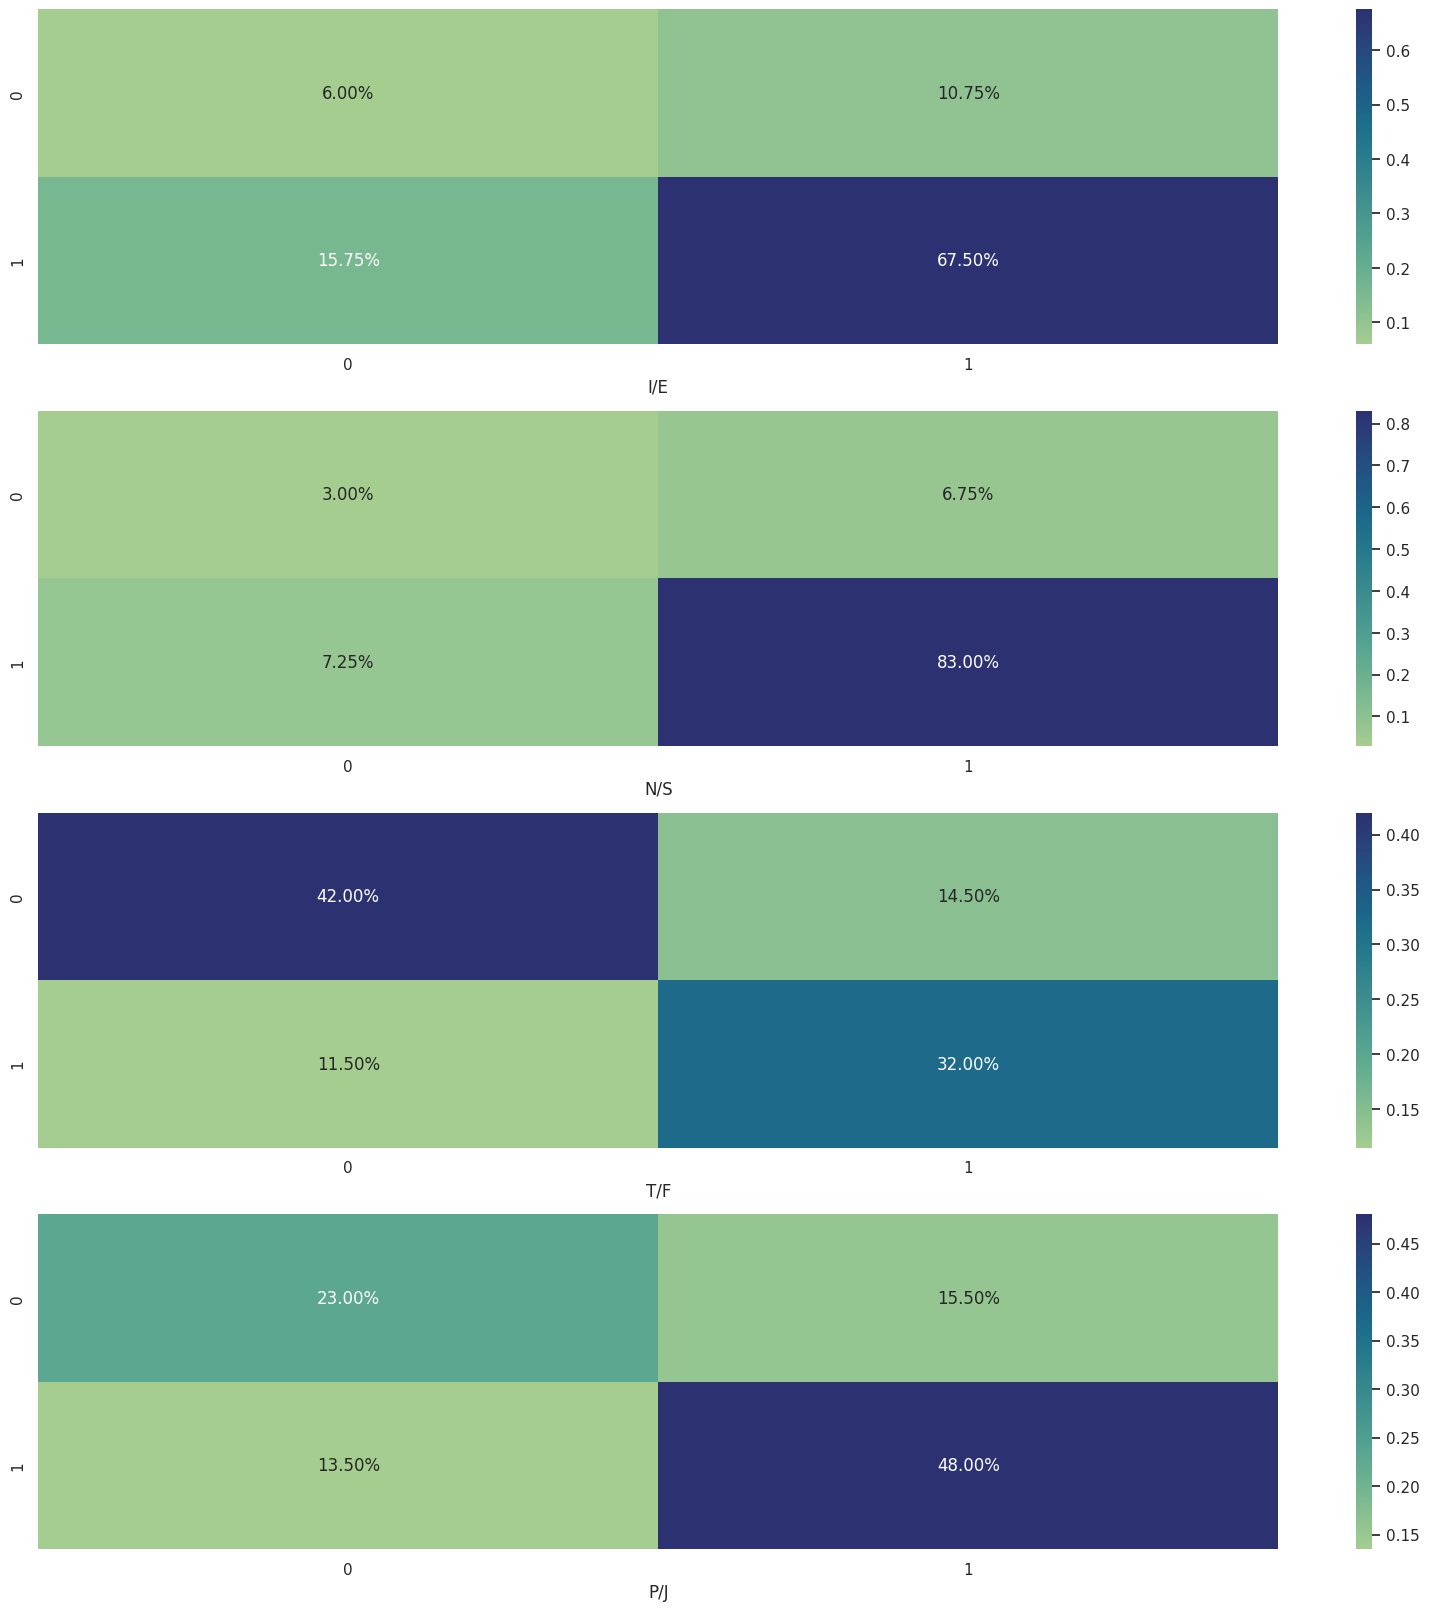

In [11]:
def predict_personality(y_train):
    sm = SMOTE(random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(corpus, y_train,test_size=0.2, random_state= 42)     
    print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
    X_train, y_train = sm.fit_resample(X_train,y_train)
    print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
    print("After OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

    #X_test, y_test = sm.fit_resample(X_test,y_test)

    lr = LogisticRegression(solver = "saga")
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_train)
    print("Training Set accuracy: ", accuracy_score(y_pred, y_train))
    y_pred = lr.predict(X_test)
    print("Test set accuracy: ", accuracy_score(y_pred, y_test))
    #_ = ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
    return confusion_matrix(y_pred, y_test)/len(y_pred)
f, axs = plt.subplots(4,1, figsize = (20,20))
sets = {"I/E":ie, "N/S":ns, "T/F":tf, "P/J": pj}
i = 0
for name, set in sets.items():
    print("Trait {}\n".format(name))
    _ = sns.heatmap(predict_personality(set), ax=axs[i], annot = True, cmap = "crest",fmt='.2%')
    _.set_xlabel(name)
    print("\n")
    i+=1


Word Clouds by MBTI:

In [12]:
data2 = mini_dataset[["type", "modified_post"]]
data2["modified_post"] = data2["modified_post"].apply(preprocess_text)
data2.rename(columns={"type": "MBTI", "modified_post": "mp"}, inplace= True)

/tmp/ipykernel_18/4019376900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["modified_post"] = data2["modified_post"].apply(preprocess_text)
/tmp/ipykernel_18/4019376900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.rename(columns={"type": "MBTI", "modified_post": "mp"}, inplace= True)


In [13]:
def word_cloud(mbti):
    mbti_texts = ""
    mbti_list = data2[data2["MBTI"] == mbti]
    mbti_text = data2["mp"]
    #print(mbti_list)
    for m in mbti_text:
        mbti_texts+=m
    wordcloud = WordCloud(max_font_size=50, max_words=150, background_color="white").generate(mbti_texts)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(mbti)
    plt.show()

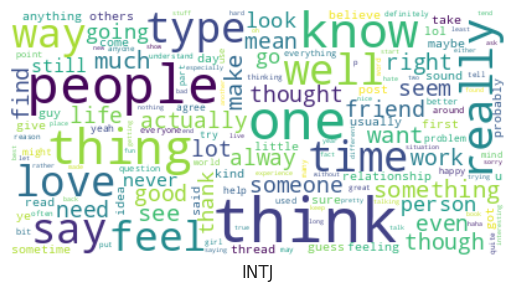

In [14]:
mbtis = ["INTJ", "INFJ", "ENTP", "ENFP", "ISTJ", "ISFJ", "ESTP", "ESFP", "INTP", "ISTP", "ENTJ", "ESTJ", "INFP", "ISFP", "ESFJ", "ENFJ"]
word_cloud(mbtis[0])


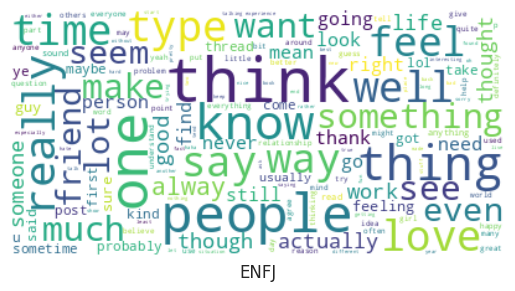

In [15]:
word_cloud(mbtis[-1])

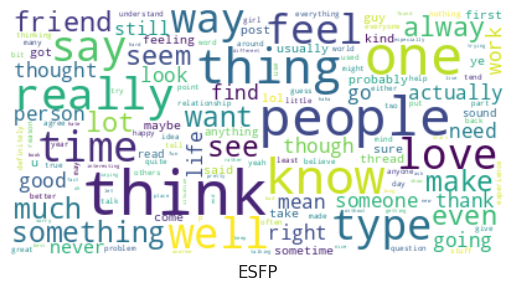

In [16]:
word_cloud(mbtis[7])

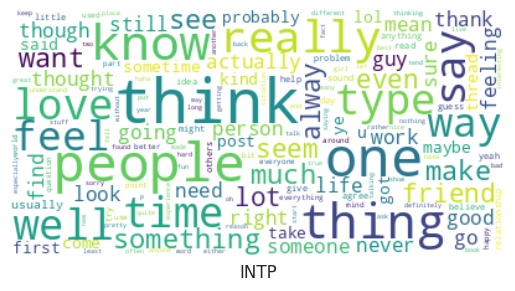

In [17]:
word_cloud(mbtis[8])

Conclusions:
* This was so much fun to do!
* In terms of the model, we were able to handle the oversampling of data by having more examples of the less common trait
* The accuracies were highest in Intuition/Sensing but lowest in Perceiving vs. Judging
